In [1]:
sim_path = r'C:\Users\oahre\OneDrive\RWTH\Simulation_Science\HiWi\CWP_SS23\2023-06-pro-voeren-gruppen\Group 5 - Quantum Annealing Particle Matching in DEM Simulations\_work_OAH\99_rocky_data\01_Particles_3160_CPU_8_GPU_0.rocky.files\simulation'


In [2]:
file_list = []
for i in range(10):
    file_list.append(sim_path + r'\rocky_simulation0000{}.rhs'.format(i))
for i in range(10,100):
    file_list.append(sim_path + r'\rocky_simulation000{}.rhs'.format(i))
for i in range(100,1000):
    file_list.append(sim_path + r'\rocky_simulation00{}.rhs'.format(i))
for i in range(1000,1201):
    file_list.append(sim_path + r'\rocky_simulation0{}.rhs'.format(i))

In [3]:
import h5py
import numpy as np

file_path = file_list[0]
f = h5py.File(file_path, 'r')
part = f.get('Particles')

In [4]:
from tqdm import tqdm
files_to_read = file_list # or file_list_2


num_particles = part['released_particles'].maxshape[0]
particles_coords = np.zeros((len(files_to_read),num_particles,3))
print('Files to read: {}'.format(len(files_to_read)))
def read_files(start, stop):
    print('    read {} files'.format(stop-start))
    for i,file in tqdm(enumerate(files_to_read[start:stop])):
        #print(i+start)
        #print(file)
        f = h5py.File(file, 'r')
        indices = f['Particles']['particles_index'][:].astype('int32')
        #print("index : ", indices)
        particles_coords[i+start,indices,0] = f['Particles']['particles_position'].fields(['x'])[:].astype('float64')
        particles_coords[i+start,indices,1] = f['Particles']['particles_position'].fields(['y'])[:].astype('float64')
        particles_coords[i+start,indices,2] = f['Particles']['particles_position'].fields(['z'])[:].astype('float64')
        #print(f['Particles']['particles_position'].fields(['x'])[:])
        #print(f['Particles']['particles_position'].fields(['y'])[:])
    return

Files to read: 1201


In [5]:
read_files(0,len(files_to_read))

    read 1201 files


1201it [00:06, 175.58it/s]


In [6]:
import threading
import cProfile
import time
threads = []
count_threads = 1

a = range(len(files_to_read))
b = np.array_split(a, count_threads)
starts = []
stops = []
for r in b:
    starts.append(r[0])
    stops.append(r[-1])
print(starts)
print(stops)

ob = cProfile.Profile()
ob.enable()

for i in range(count_threads):
    t = threading.Thread(name=None, target=read_files, args=[starts[i], stops[i]])
    threads.append(t)
    t.start()
    time.sleep(0.1)
for t in threads:
    t.join()

ob.disable()
ob.print_stats()

[0]
[1200]
    read 1200 files


1200it [00:06, 173.30it/s]

         116 function calls in 6.938 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.113    0.113 1973045242.py:20(<module>)
        1    0.000    0.000    6.825    6.825 1973045242.py:25(<module>)
        1    0.000    0.000    0.000    0.000 1973045242.py:28(<module>)
        1    0.000    0.000    0.000    0.000 _weakrefset.py:86(add)
        3    0.000    0.000    0.000    0.000 codeop.py:142(__call__)
        6    0.000    0.000    0.000    0.000 compilerop.py:166(extra_flags)
        3    0.000    0.000    0.000    0.000 contextlib.py:114(__enter__)
        3    0.000    0.000    0.000    0.000 contextlib.py:123(__exit__)
        3    0.000    0.000    0.000    0.000 contextlib.py:261(helper)
        3    0.000    0.000    0.000    0.000 contextlib.py:86(__init__)
        3    0.000    0.000    0.000    0.000 hooks.py:103(__call__)
        3    0.000    0.000    0.000    0.000 hooks.py

In [7]:
particles_coords[10]

array([[-0.01664572, -0.0262954 , -0.04550473],
       [-0.0216812 , -0.02564666, -0.04136161],
       [-0.02244058, -0.02816349, -0.04730685],
       ...,
       [ 0.05927269, -0.05143958,  0.03205421],
       [ 0.03833303, -0.05158338,  0.05263567],
       [ 0.03921335, -0.05175814,  0.04102972]])

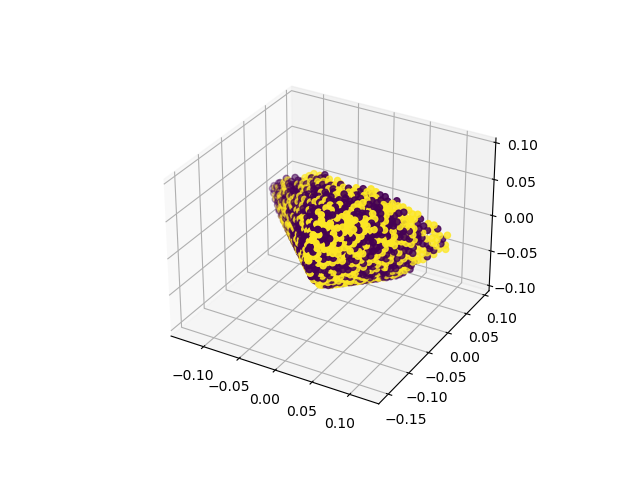

In [8]:
import matplotlib.pyplot as plt
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
#ax.scatter(particles_coords[10,:,0], particles_coords[10,:,1], particles_coords[10,:,2])
colors = np.zeros_like(particles_coords[1200,:,0])
colors[np.where(particles_coords[0,:,0]>0)]=1
ax.scatter(particles_coords[1200,:,0], particles_coords[1200,:,1], particles_coords[1200,:,2], c=colors)
ax.set_aspect('equal')

In [9]:
# solution written every 0.05 seconds, started at 0.0
f = h5py.File(files_to_read[10], 'r')
print(f.attrs['time_value'])
f = h5py.File(files_to_read[310], 'r')
print(f.attrs['time_value'])
f = h5py.File(files_to_read[610], 'r')
print(f.attrs['time_value'])
f = h5py.File(files_to_read[910], 'r')
print(f.attrs['time_value'])

f = h5py.File(files_to_read[910], 'r')
print(dir(f))
print(f.keys())
print(dir(f['Particles']))
print((f['Particles'].keys()))
print((f['Particles'].attrs.keys()))
print(dict(f.attrs.items()))
print(dict(f['Particles'].attrs.items()))
print(dict(f['Particles']['ParticleScalars'].attrs.items()))


[0.5]
[15.5]
[30.5]
[45.50000001]
['_MutableMapping__marker', '__abstractmethods__', '__bool__', '__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__nonzero__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__setattr__', '__setitem__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_d', '_e', '_gcpl_crt_order', '_id', '_ipython_key_completions_', '_lapl', '_lcpl', '_libver', 'attrs', 'build_virtual_dataset', 'clear', 'close', 'copy', 'create_dataset', 'create_dataset_like', 'create_group', 'create_virtual_dataset', 'driver', 'file', 'filename', 'flush', 'get', 'id', 'items', 'keys', 'libver', 'mode', 'move', 'nam

In [10]:
# compute distacnce of particles between two datasets

def calc_phi_ij(coords_n, coords_n_minus_1):
    print('Compute distance function of {} particles'.format(num_particles))
    phi_ij = np.zeros((num_particles, num_particles))
    for i in range(3): # loop over x,y,z
        phi_ij += np.square(np.subtract.outer(coords_n[:,i], coords_n_minus_1[:,i]))
    phi_ij = np.sqrt(phi_ij)
    #print(phi_ij)
    return(phi_ij)

In [11]:
index_initial_data = 310
index_final_data = 610
calc_phi_ij(particles_coords[index_final_data], particles_coords[index_initial_data])

Compute distance function of 3160 particles


array([[0.05742671, 0.01055689, 0.06857069, ..., 0.07989793, 0.03173014,
        0.05028624],
       [0.05999238, 0.04845615, 0.09184162, ..., 0.09142335, 0.04427901,
        0.06722452],
       [0.05824281, 0.06600248, 0.01413266, ..., 0.03286435, 0.04406975,
        0.04550069],
       ...,
       [0.04930749, 0.04655833, 0.02465633, ..., 0.05363437, 0.03760625,
        0.04862493],
       [0.09343477, 0.09552541, 0.05253386, ..., 0.02039041, 0.06735249,
        0.04848124],
       [0.05927303, 0.03605984, 0.05574458, ..., 0.05489929, 0.01845194,
        0.02627276]])